
---
<big><big><big><big><big><big>Sieci neuronowe 2018</big></big></big></big></big></big>

---





---
<big><big><big><big><big>Uczenie -- metody adaptacyjne</big></big></big></big></big>

---



---

<id=tocheading><big><big><big><big>Spis treści</big></big></big></big>
<div id="toc"></div>

---

In [4]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [5]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.style.use("fivethirtyeight")

#from bokeh.io import gridplot, output_file, show
#from bokeh.plotting import figure, output_notebook
#from bkcharts import Scatter

output_notebook()

In [ ]:
sns.set(font_scale=2.0)

Image inclusion
<img src="../nn_figures/" width="100%">


# Przyspieszanie uczenia, regularyzacja
1. SGD jest bardzo stochastyczne
2. branie większych batchy stabilizuje uczenie, ale potrzeba więcej obliczeń dla jednej poprawki
  * w rzeczywistości najwazniejszy jest stosunek `learning_rate / batch_size`
    * będzie na ćwiczeniach
3. preprocessing
4. rozróżnienie uczenia w różnych kierunkach
5. metody wyższych rzędów

## Momentum
1. podąża w kierunku największego spadku
  * pamięta zwolnienia/przyspieszenia
  $$E(W_t+v_t)=E(W_t)+v_t\nabla{}E(W_t)+O(v_t^2)$$
  * krok $$v_t=-\alpha\nabla{}E(W_t)$$ __zmniejszy__ wartość $E()$
2. __metoda momentum__
 $$\begin{align}v_{t}&=-\alpha\nabla{}E(W_t)+\lambda{}v_{t-1}\\
 W_{t+1}&=W_{t}+v_{t}
 \end{align}$$
   * $\lambda\in[0,1)$, zwykle $\lambda=0.9$
   * dobry wybór: $\alpha=0.1, \lambda=0.9$
     * poźniejsza modyfikacja wielkością batcha
3. pamięta jedynie by podążać w głównym kierunku
  * nie patrzy wprzód
 <img src="nn_figures/sgd-various-speed.gif" width="80%"> 


## Regularyzacja
1. poprawia regularyzację
  * ogranicza przestrzeń funkcji możliwych do realizacji
  * typowa brzytwa Ockhama
2. Weight decay
  $$\begin{align}
  w_{t}&=w_{t-1}-\alpha\nabla{}E(w_{t-1})-\lambda{}w_{t-1}\\
  &=(1-\lambda)w_{t-1}-\alpha\nabla{}E(w_{t-1})
  \end{align}$$
3. regularyzacja L2
  $$E(w)=E(w)+\frac{1}{2}\lambda\|w\|^2_2$$
    * gradient $E$
    $$\nabla{}E(w)=\nabla{}E(w)+\lambda{}w$$
4. kontroluje nieograniczony wzrost wag
5. biblioteki dodają czynnik L2 albo bezpośrednio modyfikują gradient
6. okazuje się, że L2 i weight decay __nie są równoważne__!

## SGD z momentum: L2 czy weight decay
1. oznaczenia (dla zgodności z późniejszym Adam)
  * $\alpha$ współczynnik uczenia
  * $\beta_1$ momentum
  * $\beta_2$ drugi współczynnik momentu (Adam)
  * $\lambda_t$ weight decay
  * $\eta_t$ współczynnik schematu uczenia (stały, malejący, zmienny)
  * $m_t$ wektor przesunięcia ($m_{t=0}=0$)
  * $v_t$ drugi wektor przesunięcia (Adam, $v_{t=0}=0$)
  
| SGD z momentum  plus regularyzacja L2                | SGD z momentum plus weight decay       |
|--------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------|
| $t=t+1$                                   | $t=t+1$                                   |
| $g_t=\nabla{}E(w_{t-1})+\lambda_tw_{t-1}$ | $g_t=\nabla{}E(w_{t-1})$                  |
| $\eta_t=scheduleMultiplier(t)$            | $\eta_t=scheduleMultiplier(t)$            |
| $m_t=\beta_1{}m_{t-1}+\eta_t\alpha_tg_t$  | $m_t=\beta_1{}m_{t-1}+\eta_t\alpha_tg_t$  |
| $w_t=w_{t-1}- m_t$                        | $w_t=w_{t-1}- m_t-\eta_t\lambda_tw_{t-1}$ |
2. wbrew pozorom poprawki różnią się, co może mieć wpływ
  * dla definicji funkcji kosztu z regularyzacją L2
  $$\begin{align}
  w_t&=w_{t-1}- m_t\\
  &=w_{t-1}-\beta_1{}m_{t-1}-\eta_t\alpha_tg_t\\
  &=w_{t-1}-\beta_1{}m_{t-1}-\eta_t\alpha_t(\nabla{}E(w_{t-1})+\lambda_tw_{t-1})\\
  &=w_{t-1}-\beta_1{}m_{t-1}-\eta_t\alpha_t\nabla{}E(w_{t-1})-\mathbf{\eta_t\alpha_t\lambda_tw_{t-1}}
  \end{align}$$
    * współczynniki uczenia $\alpha_t$ i weight decay $\lambda_t$ są ze sobą związane
    * trudno jest wybrać jeden niezależnie od drugiego
  * dla SGD z weight decay
  $$\begin{align}
  w_t&=w_{t-1}- m_t-\eta_t\lambda_tw_{t-1}\\
  &=w_{t-1}-\beta_1{}m_{t-1}-\eta_t\alpha_tg_t-\eta_t\lambda_tw_{t-1}\\
  &=w_{t-1}-\beta_1{}m_{t-1}-\eta_t\alpha_t\nabla{}E(w_{t-1})-\mathbf{\eta_t\lambda_tw_{t-1}}
  \end{align}$$
    * oczywiście można znaleźć $\lambda'=\alpha\lambda$ i rozwiązania będą identyczne, ale modyfikacje $\alpha_t$ i $\lambda_t$ utrudniają proces i prostą analizę
    * $\alpha_t$ i $\lambda_t$ są niezależne, co powinno ułatwiać szukanie hiperparametrów
  <img src="nn_figures/sgd_momentum.pdf" width="100%">[Loshchilov, Hutter, arXiv:1711.05101]  
  

## Metoda Nesterova 
1. spojrzenie __wprzód__ z oszacowaniem nowego $w_{t+1}$
  * gradient obliczany w nowym miejscu
  $$\begin{align}
  v_{t+1}&=(1+\beta)w_t-\beta{}w_{t-1}\\
  &=w_t+\beta(w_t-w_{t-1})\\
  w_{t+1}&=v_{t+1}-\alpha\nabla{}E(v_{t+1})\\
  &=w_{t}+\beta(w_t-w_{t-1})-\alpha\nabla{}E(v_{t+1})
  \end{align}$$
  * $v_{t+1}$: położenie po pewnej ekstrapolacji na podstawie poprzednich zmian
3. __optymalny__ dla optymalizacji wypukłej
  * __wygładza__ ostatnie dwie wartości $w$
  * __ekstrapoluje__ obliczając gradient w tym nowym punkcie
  * tak jak momentum __kontunuuje__ poprawianie $W$ w poprzednim kierunku
  $$\begin{align}
  v_{t+1}&=-\alpha\nabla{}E(w_{t}+\beta{}v_t)+\beta{}v_t\\
  w_{t+1}&=w_{t}+v_{t+1}
  \end{align}$$
4. __parametry__
  * __uczenia__ $\alpha$ ustalony w eksperymentach; $0.1$ bezpieczne
  * __momentum Nesterova__ 
    * zwykle rosnący schemat $\beta_t=1-3/(5+t)$
    * w dalszych iteracjach dalej wybiega wprzód
 <img src="nn_figures/nesterov.png" width="100%">

# Metody adaptacyjne
1. jest szereg postulatów, które powinny zwiększać prędkość
  * parametry uczenia mogą się zmieniać w trakcie uczenia
  * przyspieszanie/zwalnianie w zależności od znaku pochodnej w kolejnych iteracjach

## Reguła delta-delta i pochodne
1. każdy kierunek w przestrzeni danych może się uczyć z różną prędkością
2. a może niech każdy parametr $w_{ji}$ ma osobny __modyfikowalny__ współczynnik uczenia $\alpha_{ji}$?
3. jak go zmieniać?
  * inaczej, jaki jest jego wpływ na funkcję kosztu?
  $$\frac{\partial E}{\partial \alpha_{ji}}=\frac{\partial E}{\partial y_j}\frac{\partial y_j}{\partial v_j}\frac{\partial v_j}{\partial \alpha_{ji}}$$
  gdzie $\alpha_{ji}=\alpha_{ji}(t)$ jest zależne od kroku, oraz
  $$\begin{align}
  w_{ji}(t)&=w_{ji}(t-1)-\alpha_{ji}\frac{\partial E_{t-1}}{\partial y_{j, t-1}}\\
  v_j&=\sum_iw_{ji}y_i\\
  &=\sum_iy_i\left(w_{ji}(t-1)-\alpha_{ji}\frac{\partial E_{t-1}}{\partial y_{j, t-1}}\right)
  \end{align}$$
  
  Podstawiając odpowiednie elementy (proszę sprawdzić) dostaniemy ciekawy wynik
  $$
  \frac{\partial E(t)}{\partial \alpha_{ji}(t)}=\frac{\partial E(t)}{\partial w_{ji}(t)}\frac{\partial E(t-1)}{\partial w_{ji}(t-1)}
  $$
    * wpływ $\alpha_{ji}$ na koszt jest równy iloczynowi wpływów na koszt odpowiadającej wagi $w_{ji}$ w ostatnich __dwóch__ krokach
      * liczymy po $w_{ji}$, więc to wartości skalarne
      * jeśli gardienty po wagach miały w ostatnich iteracjach ten sam znak, to uczenie trzeba przyspieszyć
      * jeśli przeciwny, to zwolnić!
      * nie ma żadnych dodatkowych obliczeń!!!
    * regguła __delta-delta__
    $$\begin{align}
    \alpha_{ji}&=\alpha_{ji}-\gamma\frac{\partial E}{\partial \alpha_{ji}}\\
    &=\alpha_{ji}-\gamma\frac{\partial E(t)}{\partial w_{ji}(t)}\frac{\partial E(t-1)}{\partial w_{ji}(t-1)}
    \end{align}$$
2. ta reguła jest bardzo niestabilna
  * patrz wybuchajace/zanikajace gradienty
  * dwie kolejne małe/duże wartosci mogą totalnie nagle zmienić $\alpha_{ji}$
3. dla stabilności zmiany przez 
  * mnożenie przez stały czynnik dla wzrostu/spadku $\alpha$
  * (__delta-bar-delta__) wzrost przez __dodanie__ małej wartosci, spadek przez mnożenie przez stały czynnik w zależności od znaku iloczynu gradientów
  
4. resilient propagation
  * delta-delta i jej modyfikacje w dalszym ciągu niestabilne
  * zmiany wag uzależnione jedynie od __znaku__ gradientu: zmiana jedynie gdy gradienty zgodne
  $$w_{ji}=w_{ji}-\alpha_{ji}(t)\,sgn(\nabla_{ji}E(t))\;\;\;iff \;\;\;\nabla_{ji}E(t)\nabla_{ji}E(t)\geq0$$
  * w przeciwnym wypadku wagi są nie zmieniane a gradient zerowany $\nabla_{ji}E(t)=0$
    * __wyhamowanie__ w miejscu, zamiast zwolnienia, gdy uczenie wpada oscylacje
  * prędkość uczenia jest przejmowana przez wartość $\alpha_{ji}$
  $$
  \alpha_{ji}(t+1)=\left\{
  \begin{align}
  min(u\cdot\alpha_{ji},\alpha_{max})&\nabla_{ji}E(t)\hskip{3em}\nabla_{ji}E(t)\nabla_{ji}E(t-1)>0\\
  max(d\cdot\alpha_{ji},\alpha_{min})&\nabla_{ji}E(t)\hskip{3em}\nabla_{ji}E(t)\nabla_{ji}E(t-1)<0\\
  \alpha_{ji}(t)&
  \end{align}
  \right.
  $$
  dla $u>1 \;(\simeq1.05),\; d<1 \;(\simeq0.8)$
  * na płaskim obszarze algorytm przyspiesza
  * pochłania ewentualne oscylacje
  * ale oczywiście są już lepsze
  
5. to typowe algorytmy __adaptujące__
  * zbierają statystykę ostatnich zmian
  * jednak tylko dwóch ostatnich, przestają być odporne, gdy są małe oscylacje
  * do wszystkich można dodać czynnik momentum

## Adam  
|Adam z momentum plus regularyzacja L2    |Adam z momentum plus regularyzacja weight decay|
|-------------------------------------------|---------------------------------------|
| $t=t+1$                                   | $t=t+1$                               |
| $g_t=\nabla{}E(w_{t-1})\mathbf{+\lambda_tw_{t-1}}$ | $g_t=\nabla{}E(w_{t-1})$     |
| $m_t=\beta_1m_{t-1}+(1-\beta_1)g_t$       | $m_t=\beta_1m_{t-1}+(1-\beta_1)g_t$   |
| $v_t=\beta_2v_{t-1}+(1-\beta_2)g_t^2$     | $v_t=\beta_2v_{t-1}+(1-\beta_2)g_t^2$ |
| $\widehat{m}_t=m_t/(1-\beta_1^t)$         | $\widehat{m}_t=m_t/(1-\beta_1^t)$     |
| $\widehat{v}_t=v_t/(1-\beta_2^t)$         | $\widehat{v}_t=v_t/(1-\beta_2^t)$     |
| $\eta_t=scheduleMultiplier(t)$            | $\eta_t=scheduleMultiplier(t)$        |
| $w_t=w_{t-1}-\eta_t\alpha{}\widehat{m}/(\sqrt{\widehat{v}_t}+\epsilon)$| $w_t=w_{t-1}-\eta_t\left(\alpha{}\widehat{m}/(\sqrt{\widehat{v}_t}+\epsilon)\mathbf{+\lambda_tw_{t-1}}\right)$|
1. metoda adaptacyjna
2. $v_t$ przechowuje wygładzone amplitudy gradientów dla parametrów
  * normalizuje gradienty parametrów przez wartość $\sqrt{\widehat{v}_t}+\epsilon$
  * w ten sposób momentum mało przypomina oryginalną definicję weight decay chociaż odpowiada kosztowi L2
3. w rozwiązaniu z wbudowanym kosztem L2 współczynniki uczenia $\alpha$ i decay $\lambda$ są ze sobą splatane
  * rozwiniecie do weight decay uniezależnia je
3. w problemach rozpoznawania obrazów SGD z momentum radzi sobie najlepiej!

1. Adam z weight decay i rozdzielonoymi hiperparametrami uczenia $\alpha$ i deacay $\lambda$ uczy się lepiej dając sporo lepszą generalizację
<img src="nn_figures/adam-learn.pdf" width="100%">
2. Adam z rozdzielonymi $\alpha$ i $\lambda$ może uczyć się o wiele dłużej dając lepszą generalizację
  * szczególnie istotne z powodu normalizacji $m_t$ i $v_t$ przez coraz  bardziej zanikające czynniki $(1-\beta_1^t)$ i $(1-\beta_2^t)$

# Zmienny schemat uczenia (warm restart)
1. typowa metoda dla algorytmów nie-gradientowych, np. optymalizacje metodami genetycznymi
  * szczególnie gdy funkcje są _wielomodalne_ i chcemy znaleźć więcej minimów/maksimów
  * w gradientowych przyspiesza zbieżność
2. co pewien czas schemat uczenia (hiper-parametry) są wzburzane, co pomaga na dotarcie do innych minimów niż dotąd znalezione
3. schemat warm-restart może być łatwo zrealizowany przez zdefiniowanie schematu zmiany $\eta_t$
4. kiedy pownien być restart? według jednej z prac
  * gdy funkcja celu zaczyna rosnąć
  * gdy kąt miedzy momentum a negatywnym gradientem jest __rozwarty__
    * momentum prowadzi prawdopodobnie w złym kierunku
5. [Loshchilov i Hutter] proponują schemat
$$\eta_t=\eta^i_{min}+(\eta_{max}^i-\eta^i_{min})(1+cos(\pi t_i/T_i))/2$$
  gdzie 
  * $\eta_{max}^i, \eta^i_{min}$ maksymalne i minimalna wartość $\eta_t$ w $i$-tym restarcie
    * mogą być zmienne: zmniejszanie w kolejnych restartach może poprawiać zbieżność
  * $T_i$ długość $i$-tego restartu
  * $t_i$ numer iteracji w $i$-tym restarcie
  * długości restartów powinny być coraz większe, np. wedłig $T_{i+1}=2 T_i$
6. schemat restartów działa __dopiero__ po rozdzieleniu $\alpha$ i $\lambda$

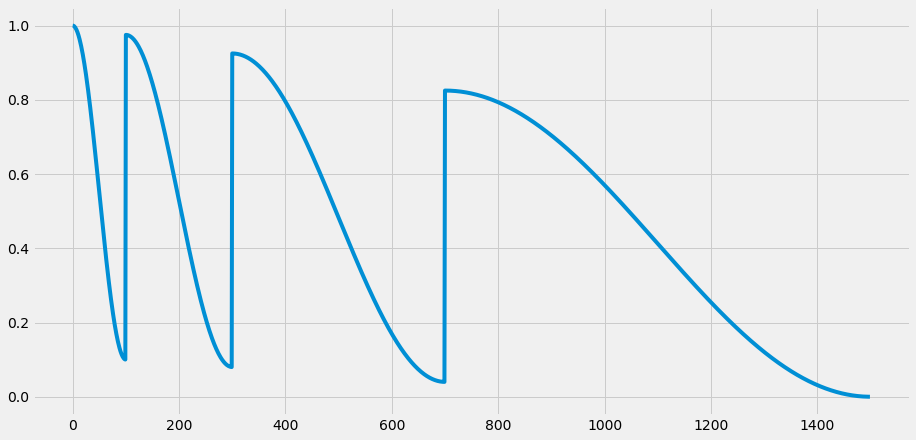

In [16]:
def lrst(t, rest): 
    return np.sum((t - rest) >= 0) - 1

eta_min = 0
eta_max = 1
restarts = np.array((0, 100, 300, 700, 1500))
eta_maxes = np.array((1, 0.975, 0.925, 0.825))
eta_mins = np.array([0.1, 0.08, 0.04, 0.0])
eta = []
for t in range(restarts[-1]):
    lst_rst = lrst(t, restarts)
    t_i = restarts[lst_rst + 1] - restarts[lst_rst]
    t_cur = t - restarts[lst_rst]
    eta_min = eta_mins[lst_rst]
    eta_max = eta_maxes[lst_rst]
    eta.append(eta_min + (eta_max - eta_min) * (1 + np.cos(np.pi * t_cur / t_i)) / 2)

fg = plt.figure(figsize=(14, 7))
plt.plot(range(restarts[-1]), eta)
plt.show()

1. restartowanie przyspiesza uczenie
2. każdy restart wzburza parametry (wagi) tak, że błąd rośnie chwilowo
<img src="nn_figures/warm-restart.pdf" width="100%">